In [239]:
%pip install openpyxl
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [240]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
from datetime import datetime

In [241]:
df_agencia = pd.read_csv("data/agencias.csv")
df_clientes = pd.read_csv("data/clientes.csv")
df_colaboradores_agencia = pd.read_csv("data/colaboradores.csv")
df_colaboradores = pd.read_csv("data/colaboradores.csv")
df_contas = pd.read_csv("data/contas.csv")
df_propostas_credito = pd.read_csv("data/propostas_credito.csv")
df_transacoes = pd.read_csv("data/transacoes.csv")

In [242]:
# Compreensão de: tipos de dados e tamanho do dataset.
for nome, df in {
    "Agencias": df_agencia, "Clientes": df_clientes, "Colaboradores_Agencia": df_colaboradores_agencia,
    "Colaboradores": df_colaboradores, "Contas": df_contas, "Propostas_Credito": df_propostas_credito,
    "Trasacoes": df_transacoes
}.items():
    print(f"\n {nome}")
    print(df.head(2), "\n")
    print(df.info(), "\n")


 Agencias
   cod_agencia             nome  \
0            7  Agência Digital   
1            1   Agência Matriz   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   

  data_abertura tipo_agencia  
0    2015-08-01      Digital  
1    2010-01-01       Física   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes
None 


 Clientes
   cod_client

In [243]:
# Verificando a existência de valores ausentes.
for nome, df in {
    "Agencias": df_agencia, "Clientes": df_clientes, "Colaboradores_Agencia": df_colaboradores_agencia,
    "Colaboradores": df_colaboradores, "Contas": df_contas, "Propostas_Credito": df_propostas_credito,
    "Trasacoes": df_transacoes
}.items():
    print(f"\n🔹 Valores nulos em {nome}:\n", df.isnull().sum())


🔹 Valores nulos em Agencias:
 cod_agencia      0
nome             0
endereco         0
cidade           0
uf               0
data_abertura    0
tipo_agencia     0
dtype: int64

🔹 Valores nulos em Clientes:
 cod_cliente        0
primeiro_nome      0
ultimo_nome        0
email              0
tipo_cliente       0
data_inclusao      0
cpfcnpj            0
data_nascimento    0
endereco           0
cep                0
dtype: int64

🔹 Valores nulos em Colaboradores_Agencia:
 cod_colaborador    0
primeiro_nome      0
ultimo_nome        0
email              0
cpf                0
data_nascimento    0
endereco           0
cep                0
dtype: int64

🔹 Valores nulos em Colaboradores:
 cod_colaborador    0
primeiro_nome      0
ultimo_nome        0
email              0
cpf                0
data_nascimento    0
endereco           0
cep                0
dtype: int64

🔹 Valores nulos em Contas:
 num_conta                 0
cod_cliente               0
cod_agencia               0
cod_colaborado

In [244]:
df_clientes.drop_duplicates(inplace=True)

In [245]:
bases_de_dados = [
    df_agencia, 
    df_clientes, 
    df_colaboradores_agencia, 
    df_colaboradores, 
    df_contas,
    df_propostas_credito,
    df_transacoes
]

In [246]:
nome_dos_arquivos = [
    "agencia.xlsx",
    "clientes.xlsx",
    "colaboradores_agencia.xlsx",
    "colaboradores.xlsx",
    "contas.xlsx",
    "propostas_credito.xlsx",
    "transacoes.xlsx"
]

In [247]:
# salvando os arquivos em uma pasta específica
pasta_destino = "trated-data/"

if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

In [248]:
arquivos_salvos = []

In [249]:
for df, nome in zip(bases_de_dados, nome_dos_arquivos):
    df.to_excel(nome, index=False) 
    arquivos_salvos.append(nome)

In [250]:
for arquivos in arquivos_salvos:
    shutil.move(arquivos, os.path.join(pasta_destino, arquivos))

In [251]:
# Cálculo de indicadores de clientes
num_clientes = df_clientes.shape[0]
num_contas = df_contas.shape[0]
saldo_medio = df_contas['saldo_total'].mean()
tipo_conta_dist = df_contas['tipo_conta'].value_counts()

In [252]:
# Cálculo de indicadores de crédito
total_propostas = df_propostas_credito.shape[0]
propostas_aprovadas = df_propostas_credito[df_propostas_credito['status_proposta'] == 'Aprovada'].shape[0]
taxa_aprovacao = (propostas_aprovadas / total_propostas) * 100

In [253]:
# # Cálculo de indicadores de transações
num_transacoes = df_transacoes.shape[0]
valor_medio_transacoes = df_transacoes['valor_transacao'].mean()
tipo_transacao_dist = df_transacoes['nome_transacao'].value_counts()

In [254]:
print(f"Número total de clientes: {num_clientes}")
print(f"Número total de contas: {num_contas}")
print(f"Saldo médio das contas: {saldo_medio:.2f}")
print(f"Taxa de aprovação de crédito: {taxa_aprovacao:.2f}%")
print(f"Número total de transações: {num_transacoes}")
print(f"Valor médio das transações: {valor_medio_transacoes:.2f}")

Número total de clientes: 998
Número total de contas: 999
Saldo médio das contas: 26543.41
Taxa de aprovação de crédito: 25.70%
Número total de transações: 71999
Valor médio das transações: 357.03


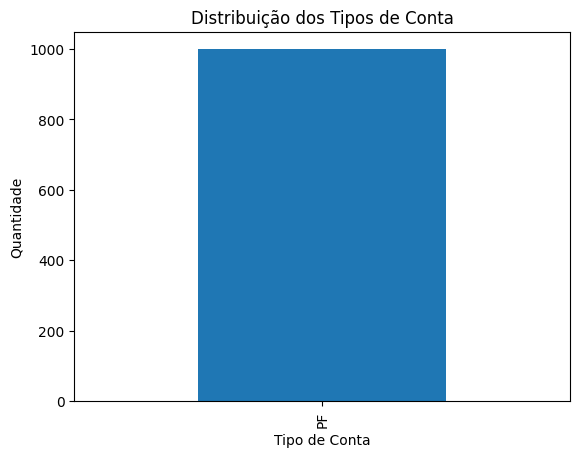

In [255]:
# Gráfico da distribuição dos tipos de conta
tipo_conta_dist.plot(kind='bar', title="Distribuição dos Tipos de Conta")
plt.xlabel("Tipo de Conta")
plt.ylabel("Quantidade")
plt.show()

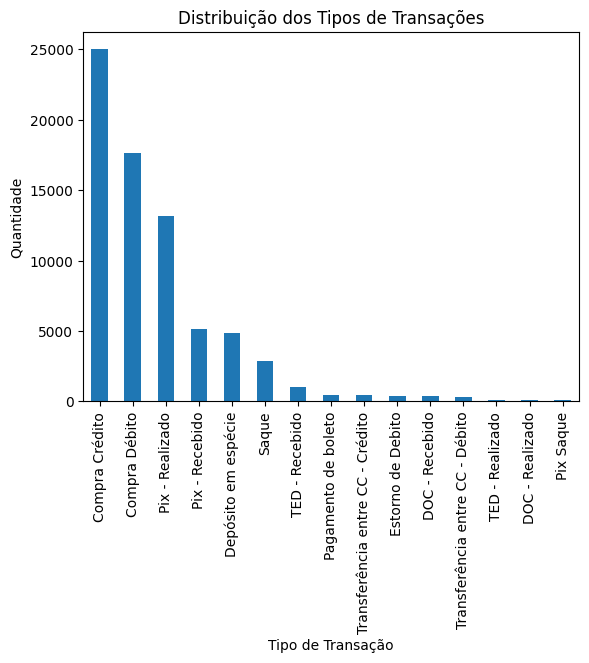

In [256]:
# Gráfico da distribuição dos tipos de transações
tipo_transacao_dist.plot(kind='bar', title="Distribuição dos Tipos de Transações")
plt.xlabel("Tipo de Transação")
plt.ylabel("Quantidade")
plt.show()

In [257]:
df_transacoes["data_transacao"] = df_transacoes["data_transacao"].str.replace(" UTC", "")

In [258]:
df_transacoes["data_transacao"] = pd.to_datetime(df_transacoes["data_transacao"], errors='coerce')

In [259]:
# Criando a dim_dates (dimensão de datas)
dim_dates = pd.DataFrame({
    'data': pd.date_range(start=df_transacoes['data_transacao'].min(), end=df_transacoes['data_transacao'].max(), freq='D')
})

In [260]:
dim_dates['ano'] = dim_dates['data'].dt.year
dim_dates['mes'] = dim_dates['data'].dt.month
dim_dates['trimestre'] = (dim_dates['mes'] - 1) // 3 + 1
dim_dates['nome_mes'] = dim_dates['data'].dt.month_name()

In [261]:
# Meses com "R" no nome
meses_com_r = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']
meses_com_r = [mes for mes in meses_com_r if 'r' in mes]

In [262]:
# Identificar se o mês tem "R" no nome
df_transacoes['mes_nome'] = df_transacoes['data_transacao'].dt.month_name()
df_transacoes['tem_r'] = df_transacoes['mes_nome'].apply(lambda x: 1 if isinstance(x, str) and x.lower() in meses_com_r else 0)

In [263]:
df_transacoes['trimestre'] = df_transacoes['data_transacao'].dt.to_period('Q')

In [264]:
trimestre_stats = df_transacoes.groupby('trimestre').agg(
    transacoes_aprovadas=('cod_transacao', 'count'),  # Contagem de transações
    volume_movimentado=('valor_transacao', 'sum')   # Soma do volume de transações
).reset_index()

In [265]:
trimestre_com_mais_transacoes = trimestre_stats.sort_values('transacoes_aprovadas', ascending=False).iloc[0]
trimestre_com_maior_volume = trimestre_stats.sort_values('volume_movimentado', ascending=False).iloc[0]


In [266]:
# Análise dos meses com "R"
meses_com_r_data = df_transacoes[df_transacoes['tem_r'] == 1].groupby('mes_nome').agg(
    transacoes=('cod_transacao', 'count'),
    volume=('valor_transacao', 'sum')
).reset_index()


In [267]:
meses_sem_r_data = df_transacoes[df_transacoes['tem_r'] == 0].groupby('mes_nome').agg(
    transacoes=('cod_transacao', 'count'),
    volume=('valor_transacao', 'sum')
).reset_index()

Trimestre com mais transações aprovadas: trimestre                   2022Q4
transacoes_aprovadas         15184
volume_movimentado      4085499.44
Name: 51, dtype: object
Trimestre com maior volume movimentado: trimestre                   2022Q4
transacoes_aprovadas         15184
volume_movimentado      4085499.44
Name: 51, dtype: object


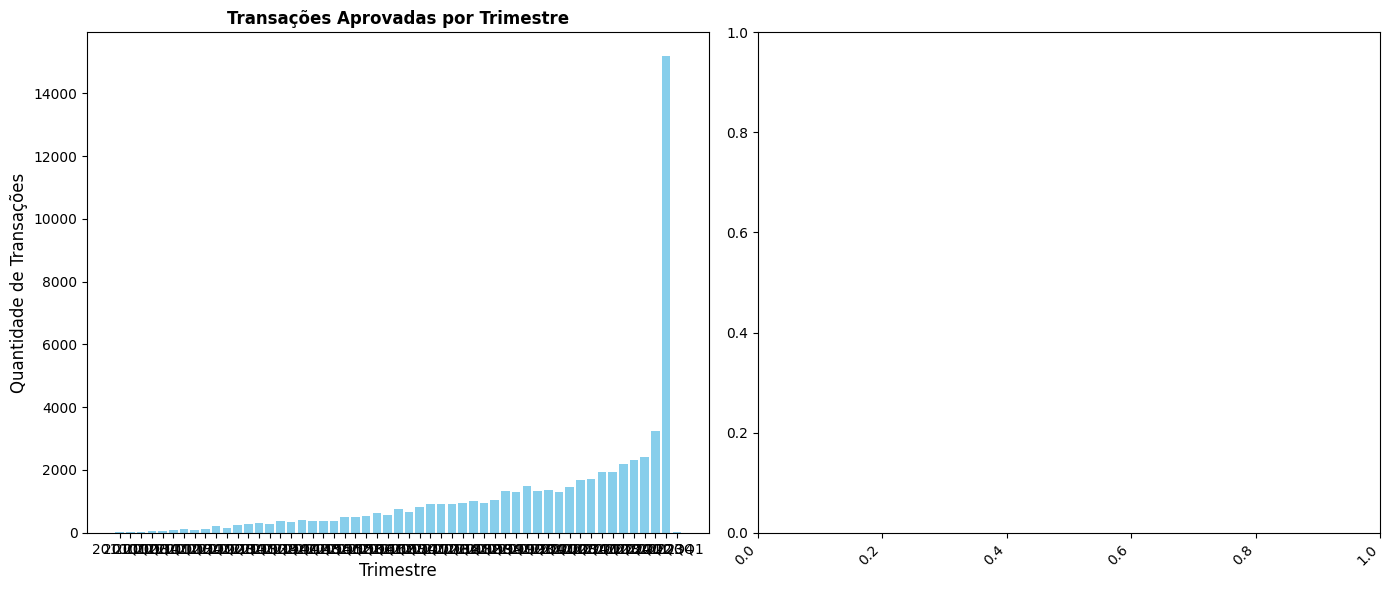

In [ ]:
# Gráfico do trimestre com mais transações
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(trimestre_stats['trimestre'].astype(str), trimestre_stats['transacoes_aprovadas'], color='skyblue')

ax[0].set_title('Transações Aprovadas por Trimestre', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Trimestre', fontsize=12)
ax[0].set_ylabel('Quantidade de Transações', fontsize=12)

ax[0].tick_params(axis='x', rotation=45)

plt.xticks(rotation=45, ha='right')

print(f"Trimestre com mais transações aprovadas: {trimestre_com_mais_transacoes}")
print(f"Trimestre com maior volume movimentado: {trimestre_com_maior_volume}")

plt.tight_layout()
plt.show()

Análise dos meses com 'R' no nome:

Meses com R - Transações: Empty DataFrame
Columns: [mes_nome, transacoes]
Index: []
Meses sem R - Transações:      mes_nome  transacoes
0       April        3497
1      August        4076
2    December       15141
3    February        2960
4     January        3489
5        July        3990
6        June        3822
7       March        3812
8         May        3670
9    November        5013
10    October        4503
11  September        4124


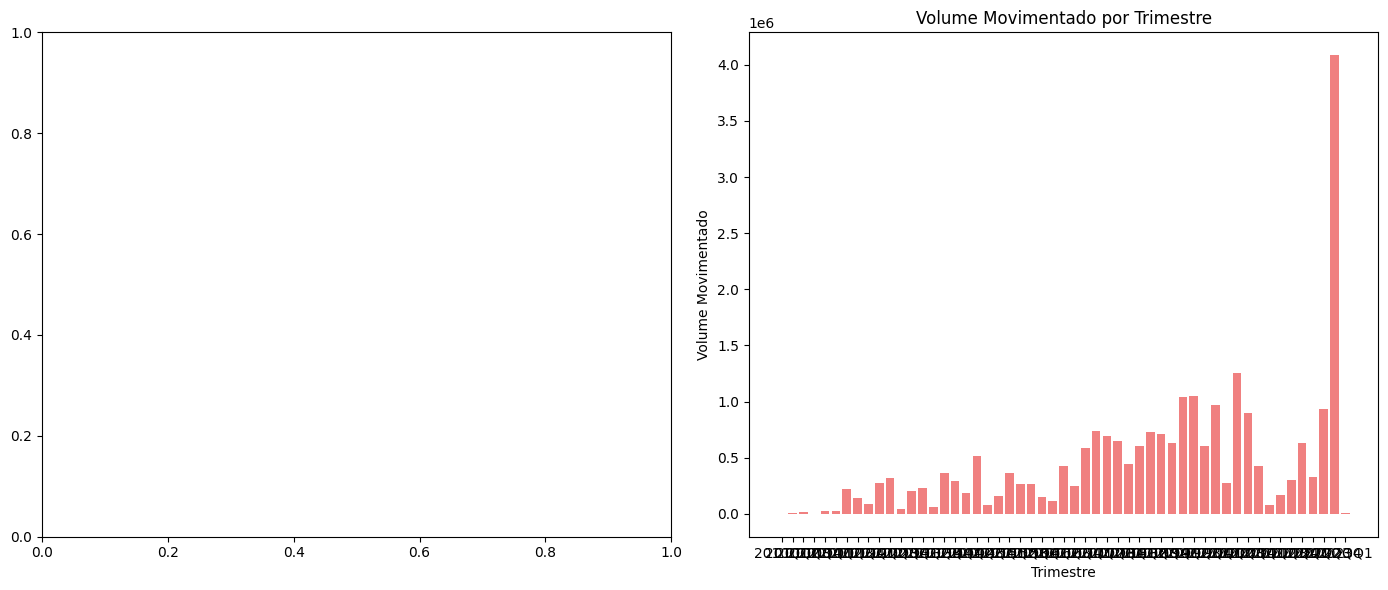

In [283]:
# Gráfico do volume movimentado

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[1].bar(trimestre_stats['trimestre'].astype(str), trimestre_stats['volume_movimentado'], color='lightcoral')
ax[1].set_title('Volume Movimentado por Trimestre')
ax[1].set_xlabel('Trimestre')
ax[1].set_ylabel('Volume Movimentado')

print(f"Análise dos meses com 'R' no nome:\n")
print(f"Meses com R - Transações: {meses_com_r_data[['mes_nome', 'transacoes']]}")
print(f"Meses sem R - Transações: {meses_sem_r_data[['mes_nome', 'transacoes']]}")

plt.tight_layout()
plt.show()